# Chemical encodings for Machine Learning - Methods and a coded example

**Dr. Christian Gierlich, Dr. Stefan Palkovits**<br/>
RWTH Aachen University<br/>
Institute for Technical and Macromolecular Chemistry<br/>
Worringerweg 2<br/>
52074 Aachen<br/>
E-mail: gierlich@itmc.rwth-aachen.de<br/>
E-mail: stefan.palkovits@itmc.rwth-aachen.de<br/>
Twitter: @PalkovitsLab<br/>

## Abstract

Chemical data must be encoded for the use in machine learning algorithms. In this article we present a selection of featurization methods. Furthermore, we give an insight into the field of application for which individual methods can be used. The introduction to this topic is facilitated by the presentation of a code example. Our goal was to provide a step-by-step tutorial that provides a basic understanding of machine learning in chemistry. For this purpose, a dataset consisting of partition coefficients for the extraction of dimethoxymethanol from an aqueous system is provided. We could show that the way of featurizing this data set plays a crucial role for model performance.  

## Introduction

Very often a machine learning project in chemistry or maybe chemical engineering begins with the task to  featurize the molecules to be machine readable. In machine learning (ML) features are the input variables of an algorithm, targets are the output variables of an algorithm and featurization means how to encode for example a picture or in this case a molecule for the use in a computer. Most of the featurization methods were developed for specific cases, hence, a selection of the methods must be done. There might be obvious choices like taking the composition of a solid catalyst in heterogeneous catalysis. Especially when facing homogeneous catalysis the challenge arises how to featurize for example ligands or substrates. We will try to give first a non-comprehensive overview of what kinds of featurization methods are available as they might differ a lot from what is used in ML for more general tasks like picture classification. The deeper you dive into the subject the more specialized the featurization might get. Then we will give a fully coded example where the outcome of the prediction of the ML algorithm will be influenced by the choice of the featurization method. 

## Featurization methods and molecular representations 

We collected some featurization methods in the following Table 1 and added some possible use cases from literature to illustrate the use of the respective featurization. This selection is not meant to be an exhaustive list but aggregates methods that from the authors point of view beginners in the field should know about. Although many of them can be found often in literature the selection is to some extent subjective. 

| Category | Featurization method                         | Feature boundaries                                   | Example  |
|:---------|:---------------------------------------------|:-----------------------------------------------------|:---------|
        | 1        | Available general feature e.g. composition   |Macroscopic perspective                | [1, 2]   |
| 2        | String based features e.g. SMILES or SELFIES | Molecule centered | [3, 4]   |
| 3        | Graph and NN based features                  | Molecule centered                                 | [5, 6]   |
| 4        | Mol2Vec                                      | Molecule centered        | [7]      |
| 5        | Coulomb matrices                             | Atom centered                         | [8, 9]   |
| 6        | Specialities                                 |System specific                            | [10, 11] |

Very often new methods are benchmarked against literature known example datasets. One very popular example in chemistry is the ESOL dataset [12] that predicts the water solubility of a molecule. The methods differ a lot and the reason is mainly their intended use. For example, methods based on SMILES are more often used in a general chemistry perspective whereas the Coulomb Matrix is more specialized towards computational chemistry. We will present the methods from above with respect to their context in the next paragraphs. The methods are listed by their perspective on the data or descriptor.  The cases have very different requirements for the design of the description. For computational chemistry, for example, each individual atom and its position in space must be precisely determined. In the case that only the unique assignment of the molecule is needed the CAS-No. can be sufficient. Accordingly, the complexity of the system and the description is related to the case presented. In general, the featurizers should be chosen so that they can describe the target well. In the following, some such cases are presented. 

### Available general features

General features are a very common choice as input for a ML task as they present a good macroscopic view on the material under investigation. E.g. one could use the composition of a solid material and then use the important target, for example a sorption capacity for maybe carbon dioxide, for the actual prediction. But general features can of course be everything else that can be expressed by a number like

- Temperatures,
- Velocities,
- Compositions or even
- Costs (e.g. CAPEX or OPEX).

This can be already a reasonable choice for a ML project and will work well in many cases. We also used this in previous studies for example to make predictions on the Oxygen Evolution Reaction (OER) [1].  A dataset from literature was taken to make predictions on catalysts which also fit with our own laboratory materials that where prepared in a different way. Another example was a study about the Oxidative Coupling of Methane (OCM) [2]. Again, a literature known dataset was used to make the predictions here. Both studies have in common that there might be good reasons to add additional features to the input parameters. For example, the study on the OCM data showed that incorporating the reaction temperature into the features leads to a better prediction. In this way we could show that incorporating physically related features in the ML-algorithm can improve predictions.  Apart from this drawback choosing features that are available out of the box will be a good start in many cases. 

### String based features

String based features are a next step towards more detailed representations especially when more than just floating-point numbers are needed to describe a substance from a molecular point of view. As the structural specialties of molecules are hard to describe in strings, efforts to do so date already back to the 1980ies when Weininger developed the still much used SMILES [13]. But there is still the need to transform the SMILES encoded features to something that is readable by an algorithm. One typical approach in literature is to use SMILES as basis for a dataset and then convert into a suitable kind of numbers. Here one possibility is to add up structural motives with the help of a one-hot-encoding. It is also very common to convert the SMILES data to a representation called fingerprint [14 - 16]. Behind these are algorithms which find the most important specifics around the heavy atoms in a molecule and converts them into numbers [3]. The most common way to do this is via the RDkit [17] software library which incorporates several fingerprinting algorithms. Unfortunately SMILES also have some drawbacks. For example, send through a neural network (NN) with an autoencoder (AE) architecture it frequently happens that the SMILES are messed up and do not represent molecules any longer. Therefore, newer representations like SELFIES [4] exist to describe a molecule by a string but after most modifications for examples SELFIES still yield a real molecule. 

In the coded example we will use three different featurization methods from the deepchem package based on fingerprints: 
- The “RDKitDescriptors” method calculates fingerprints but also additional features like molecular weight and others. 

- The “MACCSKeysFingerprint” is a frequently used general purpose fingerprinting algorithm. 

- The “CircularFingerprint” is specialized on structure-activity relationships. 

In the example we will try to predict physical properties but not the chemical reactivity. Other properties than just the molecular structure might be important there. Therefore, most probably the two methods mentioned first might outperform the last method. This will show that only small changes can lead to a different outcome and a decision which featurizer to use is not always straight forward. The evaluation of the performance of the algorithms will always go hand in hand with the evaluation of the prediction of the desired properties. 

### Graph based features

Graph based methods are mostly molecule centered methods. The idea is to understand the projection of a molecule as a kind of molecular graph . For example, Balaban describes a method to convert a molecule into a molecular graph [18]. The atoms and bonds within a molecule can be thought of as nodes and edges and are converted into vectors by the algorithm that can be used as molecular features. Consequently, this molecular representation was also used for ML applications [5]. Here the used molecules were converted into molecular graphs like stated above with the main feature being the distance between the respective atoms in a molecule. Then predictions were made on different properties. Alternative approaches that can be summarized under the concept of molecular graphs is to use the power of feature extraction from NNs, that is why this kind of featurization methods is often called Neural Fingerprints. The NNs used try to extract the molecular graph by themselves without an explicit definition of an algorithm beforehand. This area of featurization methods is developing a lot nowadays. In the cited example from Duvenaud et al. [6] this kind of fingerprint is used for several prediction tasks like for example the water solubility [12] and they are compared to the also often used circular fingerprints [15]. 

### Mol2Vec

The approach behind Mol2Vec [7] is inspired by the analogue Word2Vec approach for language processing [19]. Here each word in a sentence gets a vector by its relation to other words. The sentence can be represented by the resulting sum of all vectors. One can compare two sentences with respect to their similarity by comparing the resulting vectors. Mol2Vec uses a similar approach. Imagine each molecule under investigation as sentence and the substructure like functional groups as words. This can then be transformed based on fingerprints. The substructures are first transformed with the Morgan fingerprinting algorithm [16] leading to vectors for each substructure. Then all vectors are summed up leading to a molecule vector and therefore the method is again molecule centered. Analytically two molecule vectors can be compared for example with cosine similarity but also a visible comparison is easy by just looking at a couple of molecule vectors. One example where Mol2Vec performs good is once again the water solubility of organic molecules [12]. 

### Coulomb matrices

Computational chemistry is a field that is often much more atom centered than the methods described up to now and especially in this field there is quite a variety of different featurization methods as several current reviewing papers show [20, 21]. But even a selective list of featurization methods could not be complete when leaving out the concept of the Coulomb matrix [8] first used by Rupp et al.. One reason why it is used in the Computational Chemistry part of the community is because the Coulomb matrix has some similarities to inputs for Density Functional Theory (DFT) calculations. It is basically a matrix of the positions of the atoms in a molecule. Then the positions are combined with the nuclear charges within a molecule. This leads to a quadratic matrix which also will be symmetric and with the diagonal elements representing the self-interactions of the atoms in the molecule under investigation. Although this representation already encloses quite some information there is even more to it. For example, also the Eigenvalues carry some information [9]. The method in general is often used to model properties coming from DFT calculations like for example polarizability or atomization energies. Another important method to mention are the atom-centered symmetry functions proposed by Behler [22] that are also quite popular in computational chemistry.

### Specialities

Then there are featurization methods that would better be called something like specialties as they are system specific. As an example, Lentelink tried if it is possible to use just ordinary pictures of the 2D projections of molecules and relate them to physical properties like their solubility [10]. Just like chemists look at a drawing of a molecule and come up with an imagination how the respective molecules properties should be like. Indeed, this approach worked in the same manner that pictures work in similar "Big Data" projects. But Lentelink could also show that he could outperform a state of the art convolutional neural network (CNN) with a simpler approach including expert selected features. This leads to a take home message for specialties like these. They might be useful in some special cases but most probably will lack the generality of other approaches like fingerprints. 

Of course, this list here is not at all complete and there also some "honorable mentions" like for example the Bag of Bond method [11] which is like Mol2Vec inspired by natural language processing. New methods often have some kinds of similarities with the methods mentioned above and consider some additional special features needed for the respective application. Most probably the inclined reader now has a broad overview what is possible with molecular featurization methods. To support you with an easy start we coded the example in the next part of the manuscript for you. It is based on some of the fingerprinting methods presented earlier and the predicted quantity will be the partition coefficient important for the Oxymethylene Ether (OME) synthesis. The dataset is calculated in our group as means to screen suitable solvents. 

# How-to: Convert Molecules for machine learning algorithms

First, we import the necessary packages to work with the random forest regression algorithms. 
- In general Numpy is very useful for treating array and matrices [23] 
- Deepchem is a tool for treating molecules and forward this information to machine learning algorithms https://deepchem.readthedocs.io/en/latest/ [24] 
- Matplotlib.pyplot can be used to plot data and gives us a lot of tools to design proper graphs [25] 
- Sklearn is a subgroup of the scikit package and introduces simple to learn machine learning algorithms https://scikit-learn.org/stable/ [26] 
- Pandas is useful for data handling and supports importing method [27] 

In [1]:
import numpy as np 
import deepchem as dc 
import matplotlib.pyplot as plt 
import pandas as pd 
import time 
from sklearn.ensemble import RandomForestRegressor 
from IPython.display import Markdown as md
from sklearn.inspection import permutation_importance 
from rdkit.Chem import Descriptors
import matplotlib as mpl
mpl.rc("figure", dpi=600) 

One of the essential steps for a sufficient machine learning is a dataset which has a certain size. In general, those algorithms perform better with larger datasets. For this example, we have chosen a dataset which is generated based on a DFT method and predicts the partition coefficient of dimethoxymethanol (the shortest oxymethylene ether further noted with DMM) in different solvents during an extraction. We used COSMOThermX as software solution and it uses the method of COSMO-RS to estimate partition coefficients between DMM in water and several solvents [28-30]. Even though this method might not be the most accurate solution, it is quite fast and simple to use. In addition, the results of the screening can present a good trend of the solvents. The present dataset was generated using a database of more than 9000 components. The partition coefficient for DMM was then calculated between water and the screened solvents and is only valid for infinite dilution. 
![Extraction_DataHandling.png](Extraction_DataHandling.png)


**Figure 1: Schematic presentation of the use of solvent screening data from COSMOThermX (COSMO-RS) and the usage in machine learning. Partition coefficients are estimated for the extraction of DMM from aqueous solution into organic solvents. The dataset will be processed in a featurization step.** 

### Datasets and pretreatment

As we described we have a dataset of extraction data. These data give the partition coefficient of DMM in two solvents. The first solvent is always pure water, and the second solvent is screened. The components are in this case described with the SMILES notation which is a string-based way to describe chemicals for machine learning algorithms. For other fields like molecular calculation (e.g. Density Functional Theory, DFT) it is necessary to describe the molecule or chemical in the shape of a geometry file where each atom is named and described with its coordinates in space. This information can in general also be read with algorithms, but it might also increase the amount of data which needs to be handled by the algorithm and therefore often is not efficient enough. Most of the machine learning algorithms have an input (X, in ML called target) and an output (y, called feature).  First, we need to load the data into the Juypter notebook. The read_csv function from pandas is used for this purpose. With the head function from pandas we can get an overview of the first 10 entries of the dataset. 

In [2]:
raw_dataset = pd.read_csv("KF_Values_DMM.csv")
print(raw_dataset.head(10))

                                              SMILES  KF_Values
0                                                  O  -0.060661
1                                          OCCCCCCCC   3.024885
2                                                O=C   0.437198
3  CC(CC4C3CCC1=CC(=O)C=CC1(C)C3(F)C(O)CC42C)C2(O...   0.851197
4                     CCC2(c1ccccc1)C(=O)NC(=O)NC2=O   1.045771
5                                        OC(C)C(O)=O   0.062132
6        OC4C3C2(C)CCC(=O)C=C2CCC3C1CCC(C1C4)C(CO)=O   0.282406
7    OC(CC41C)C3C2(C)CCC(=O)C=C2CCC3C4CCC1(O)C(CO)=O   0.171474
8   OC(CC41C)C3C2(C)C=CC(=O)C=C2CCC3C4CCC1(O)C(CO)=O   1.072446
9                     OC1CCC4C3CCc2cc(O)ccc2C3CCC41C   2.980592


Visualization of an unknown dataset is always an important task. To do so we first sort the data with respect to their KF-values (the partition coefficient) and take a small look at a preview. 

In [3]:
raw_dataset.sort_values(by="KF_Values", inplace=True)
print(raw_dataset.head(10))

                                       SMILES  KF_Values
4761                               CN(C)(C)=O  -4.202612
8004  OCC1OC(OC(C(CO)OC2O)C(O)C2O)C(O)C(O)C1O  -3.759306
9247                         FC(F)(O)C(F)(F)O  -2.773420
1516                            NCCNCCNCCNCCN  -2.737173
73    OCC2OC(C(O)C(O)C2O)OC1(CO)OC(CO)C(O)C1O  -2.686396
5991                         NCCNCCNCCNCCNCCN  -2.644695
6579                              OS(O)(=O)=O  -2.643229
957                        C1N2CN(CN3C2)CN1C3  -2.603251
9212                  FC(F)(O)C(F)(F)C(F)(F)O  -2.531736
3963                               CP(C)(C)=O  -2.305623


Furthermore, in a graphical preview the data can be reviewed and evaluated. Therefore, we will now visualize the data in the following. As dummy x-values an array is created and used to plot it versus the KF-values. 

In [4]:
x_plot = np.arange(1,len(raw_dataset)+1)

The resulting plot looks like this.

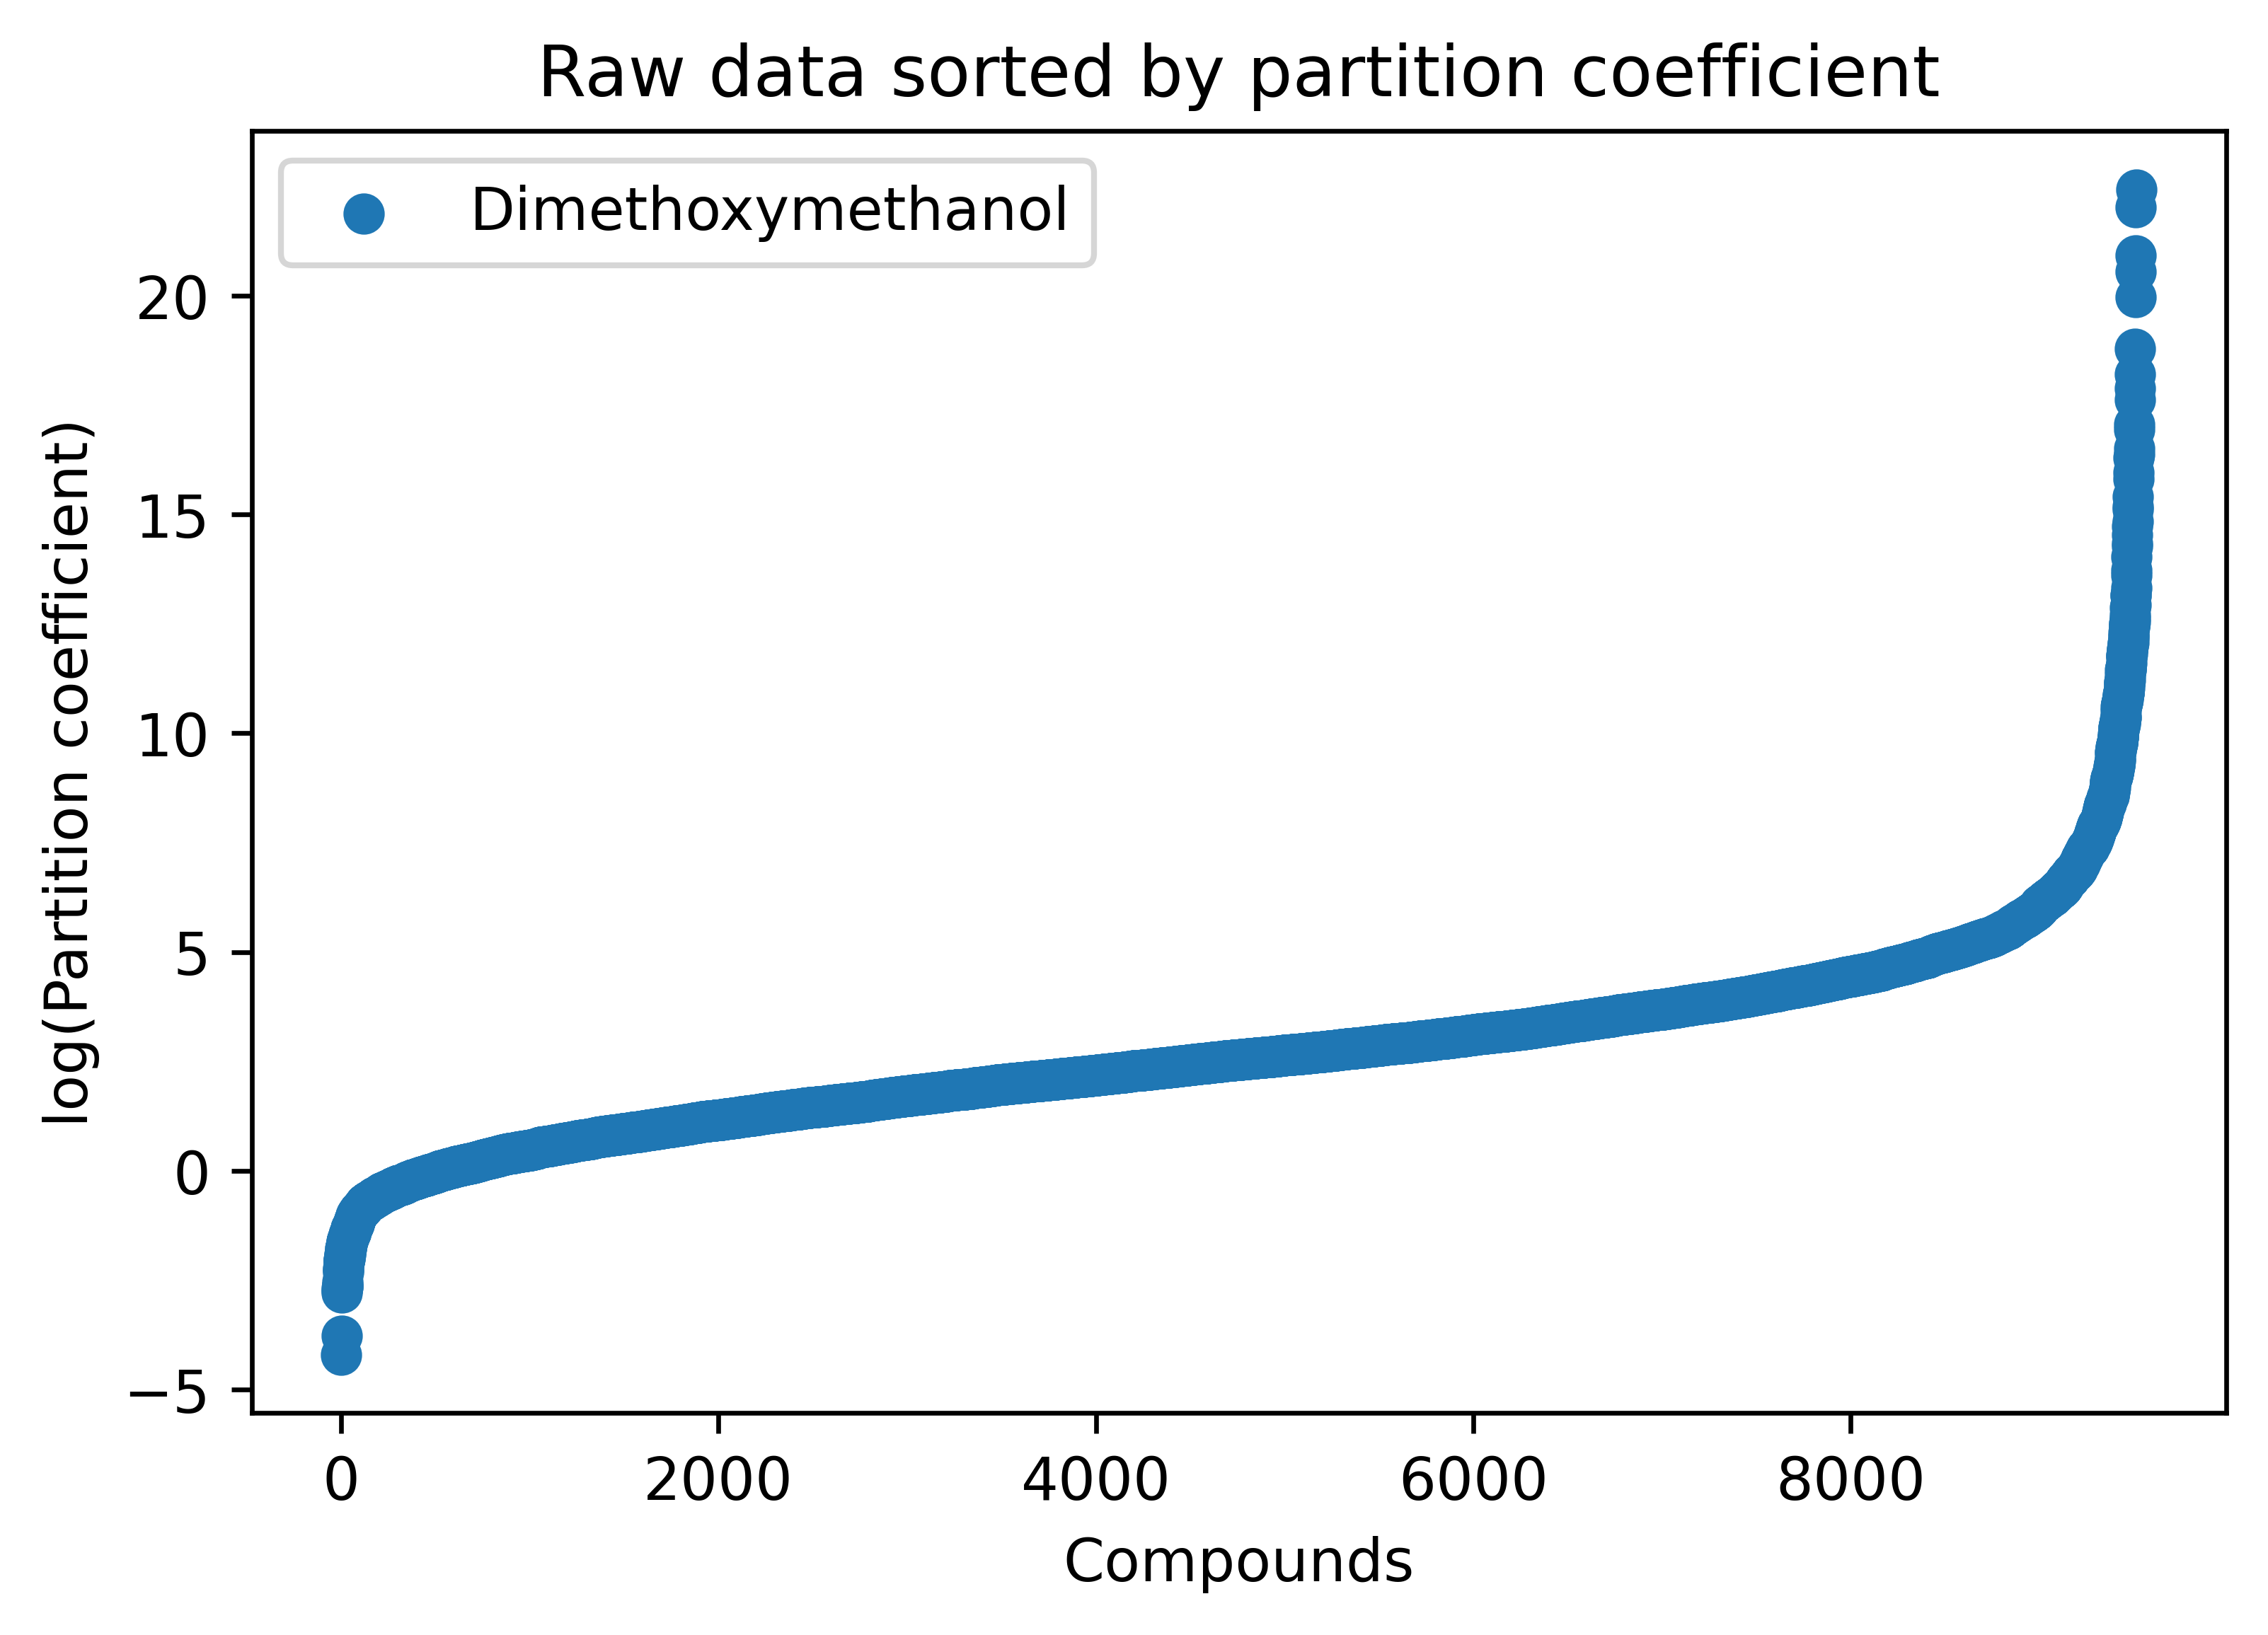

In [5]:
plt.xlabel("Compounds")
plt.ylabel("log(Partition coefficient)")
plt.title("Raw data sorted by partition coefficient")
plt.scatter(x_plot, raw_dataset.iloc[:,1], label=("Dimethoxymethanol"))
plt.legend();

**Figure 2: Sorted partition coefficients for the DMM from the COSMOThermX Screening.**

In general, some featurizer only accept float or integer as input format. In this example we can stay with floats, which is accepted by most of the featurizer functions. The array of KF-values then can be easily extracted as it is shown in the following.

In [6]:
y = raw_dataset.iloc[:, 1]

In the next step we use the RDKitDescriptor featurizer function from the package deepchem to describe the molecules. Here, the inputs are SMILES strings, which are then converted to an array comprising physical information of the molecule. Special for this method is that the algorithm calculates some molecule properties based on the SMILES string. This algorithm describes the molecule very well and furthermore it can be uniquely identified. The features are then converted to an integer as we did this with KF-Value. 

In [7]:
feater = dc.feat.RDKitDescriptors()
X_raw = raw_dataset.iloc[:, 0]
X_RDKit = feater.featurize(X_raw)

X_RDKit = (np.nan_to_num(X_RDKit))
y.fillna(value=0, inplace=True)

From input and output arrays we then create a dataset which can be used to fit in the machine learning algorithm. For the following fit we are using the NumpyDataset which accepts arrays. The total dataset is separated into a train dataset and a test dataset. With the train dataset the model is fitted and the test dataset is then used to evaluate the model on different data.  For the present example  80% of the data points are used in the train dataset and 20% in test dataset. Since the train and test data must be representative for the whole dataset the selection is randomized. 

In [8]:
np.random.seed(76)

In order to be random but also reproducible the seed of the random function of numpy is set to an arbitrary number. We here have chosen an arbitrary number  of 76 as random seed.

In [9]:
dataset_RDKit = dc.data.NumpyDataset(X_RDKit, y)
splitter=dc.splits.RandomSplitter()
train_dataset_RDKit , test_dataset_RDKit = splitter.train_test_split(dataset_RDKit)

### Modeling

Modeling can be done with different methodologies. Not necessarily the most powerful one but a very appreciated one in chemistry for its interpretability is Random Forest Modeling. This method is based on independent generated tree diagrams which lead to different branches to either regress data or to classify. The advantage of this method is the independence of the individual decision trees, which often leads to a stable and reliable model.

![Baumdiagramm_imp.png](Baumdiagramm_imp.png)
**Figure 3: Tree decision diagram for the present study with a RDKitDescriptor featurizer. Decision layers are labeled in the order from the top to the bottom. Features are verified at each node and directed to the next node.**</br>

In a tree diagram, each decision is linked to a condition. In the tree diagram shown in Figure 3, conditions are chosen that describe the data set as well as possible. For example the first decision on node 1 on feature X67 is a decision if a species is above a certain refractivity or below. We do not go more into detail to focus on featurization and not on the chemical meaning.

The features of the data set are queried chronologically in a tree diagram. For a random model, on the other hand, the features are chosen randomly. The number of features is determined by the featurizer. In the case of the RDKitDescriptor, each data point is given 208 characteristics, which are physical properties derivable from the molecule structure.  The time to fit the model scales with the number of features and also with the size of the train dataset. In the present study a random forest regression is used to fit the model with the train dataset. Afterwards, the model is evaluated with the test dataset using the R2-Score. In this way, a statement can be made as to whether the model can correctly predict foreign data.

In [10]:
start_time=time.time() 
sklearn_model = RandomForestRegressor(random_state=0) 
model_0 = dc.models.SklearnModel(sklearn_model) 
model_0.fit(train_dataset_RDKit) 
train_scores = model_0.evaluate(test_dataset_RDKit, [dc.metrics.Metric(dc.metrics.r2_score)]) 
print(train_scores, "It took", np.around(time.time()-start_time,0), "seconds to fit")

{'r2_score': 0.9377075776616106} It took 40.0 seconds to fit


Modeling with all features may well take some time, as shown in the previous example. Therefore, in the next step we try to reduce the time of such a model by systematically excluding features. For this purpose, the importance of each feature can be evaluated. By means of the following script, the influence of each feature on the quality of the fit is considered. 


In [11]:
start_time = time.time() 
result = permutation_importance(sklearn_model, test_dataset_RDKit.X, test_dataset_RDKit.y, n_repeats=150, random_state=0, n_jobs=-1) 
elapsed_time = time.time() - start_time 
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")  
forest_importances = pd.Series(result.importances_mean) 

Elapsed time to compute the importances: 1008.253 seconds


With the permutation importance tool, we investigate the influence of each feature on the model performance. Here each feature is weighted with random weights and evaluated compared to the original fit. We then call the names of the features of the RDKitDescriptor and sort it for the highest importance.  

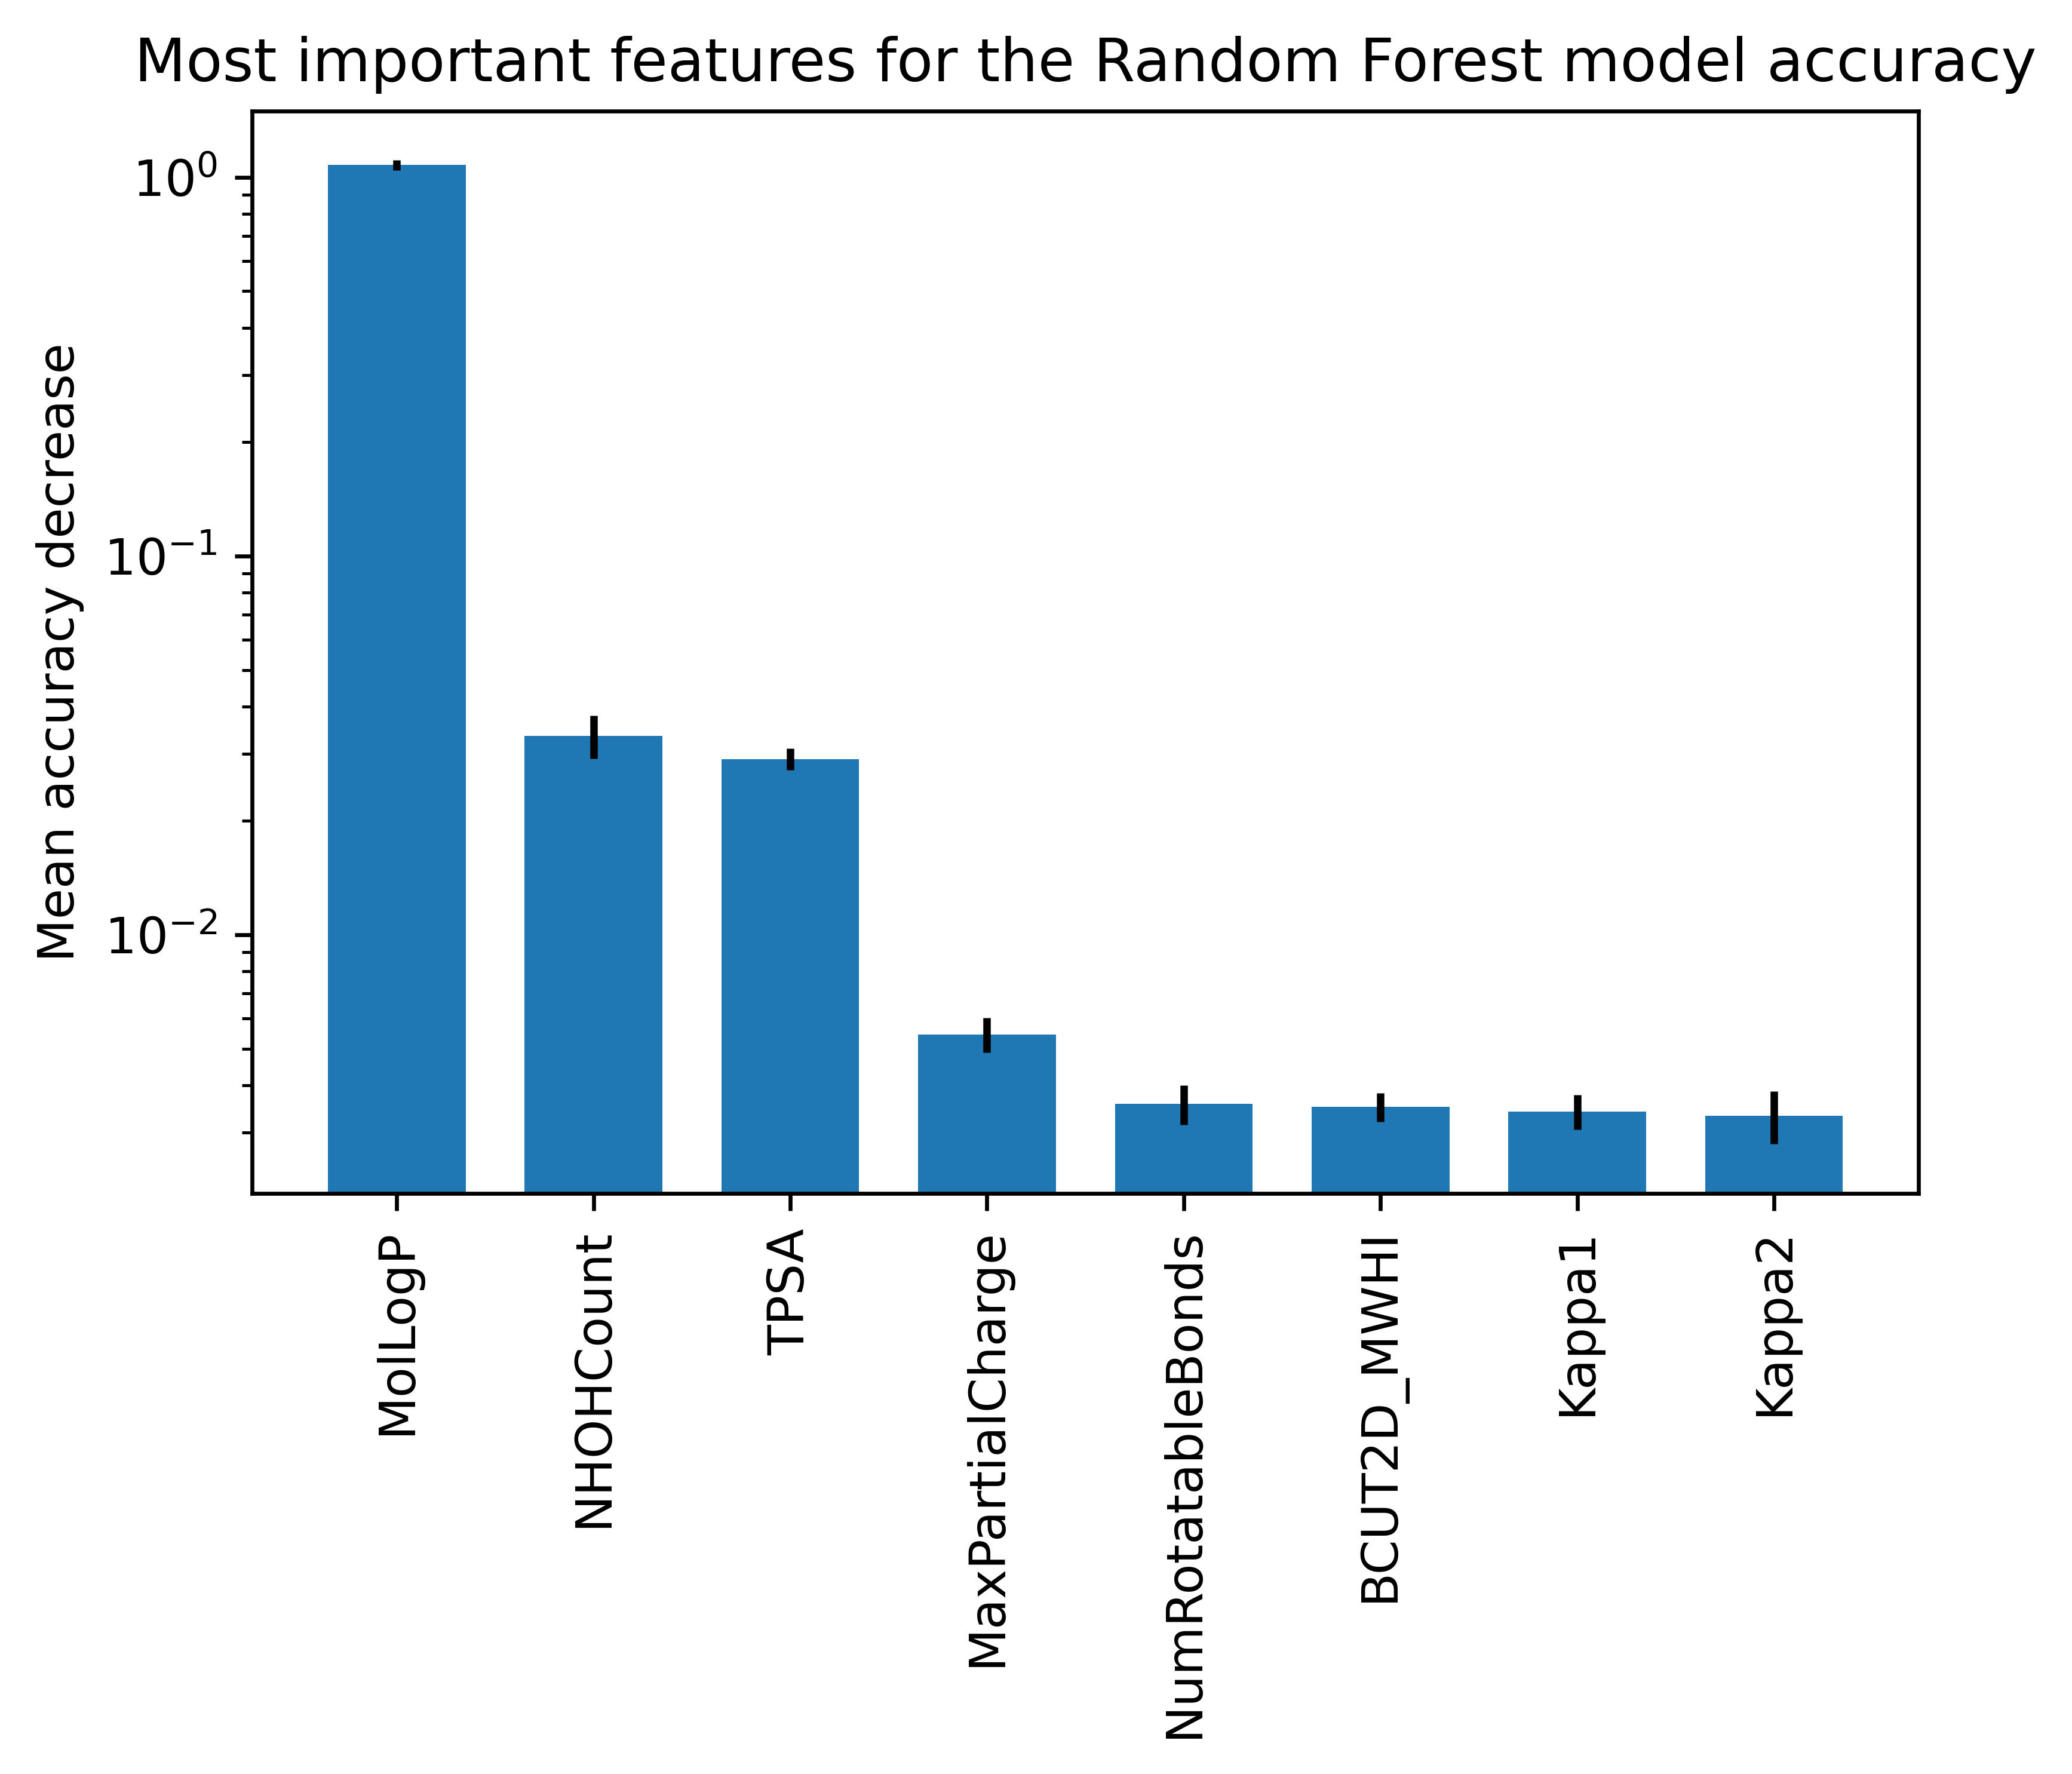

In [12]:
from rdkit.Chem import Descriptors 
Names_Feat=[] 
for i,des in enumerate(Descriptors.descList): 
  Names_Feat.append(des[0])  
data_frame = pd.DataFrame(Names_Feat)  
data_frame["Importance"] = pd.Series(forest_importances, index=data_frame.index)
data_frame["Error"]=pd.Series(result.importances_std,index=data_frame.index)
X_size=8 
data_frame_sort=data_frame.sort_values(by=["Importance"],ascending=False) 
fig, ax = plt.subplots() 
plt.bar(data_frame_sort.iloc[0:X_size,0],data_frame_sort.iloc[0:X_size,1],width=0.7, yerr=data_frame_sort.iloc[0:X_size,2]) 
ax.set_title("Most important features for the Random Forest model accuracy") 
ax.set_ylabel("Mean accuracy decrease") 
ax.set_yscale("log") 
plt.xticks(data_frame_sort.iloc[0:X_size,0],rotation=90); 

**Figure 4: List of the most important RDKitDescriptor features of the Random Forest model. MolLogP describes the partition coefficient of the molecule in a water-octanol mixture [30]. NHOHCount calculates the number of NH and OH groups in the molecule. TPSA calculates the polar surface area of the molecule [31]. MaxPartialCharge describes the max partial charge in the molecule. Kappa2 are shape describing factors of the molecule.**

The RDKitDescriptor already calculates some partition coefficients (MolLogP) on the base of group contribution. It estimates how the solvent will behave in a binary water-octanol phase system. Hence, this partition coefficient is quite close to the calculation we performed in our screening and shows by far the highest importance. The NHOHCount (number of NH and OH-Groups in the molecule) and TPSA (topological polar surface area) play compared to the MolLogP only a subordinated role [30, 31]. Nevertheless, those parameters describe even in different ways the polarity of a molecule.  

In the next step we will compare the predicted data and the data from the training set. We can do an easy plot which shows the predicted value over the real value.

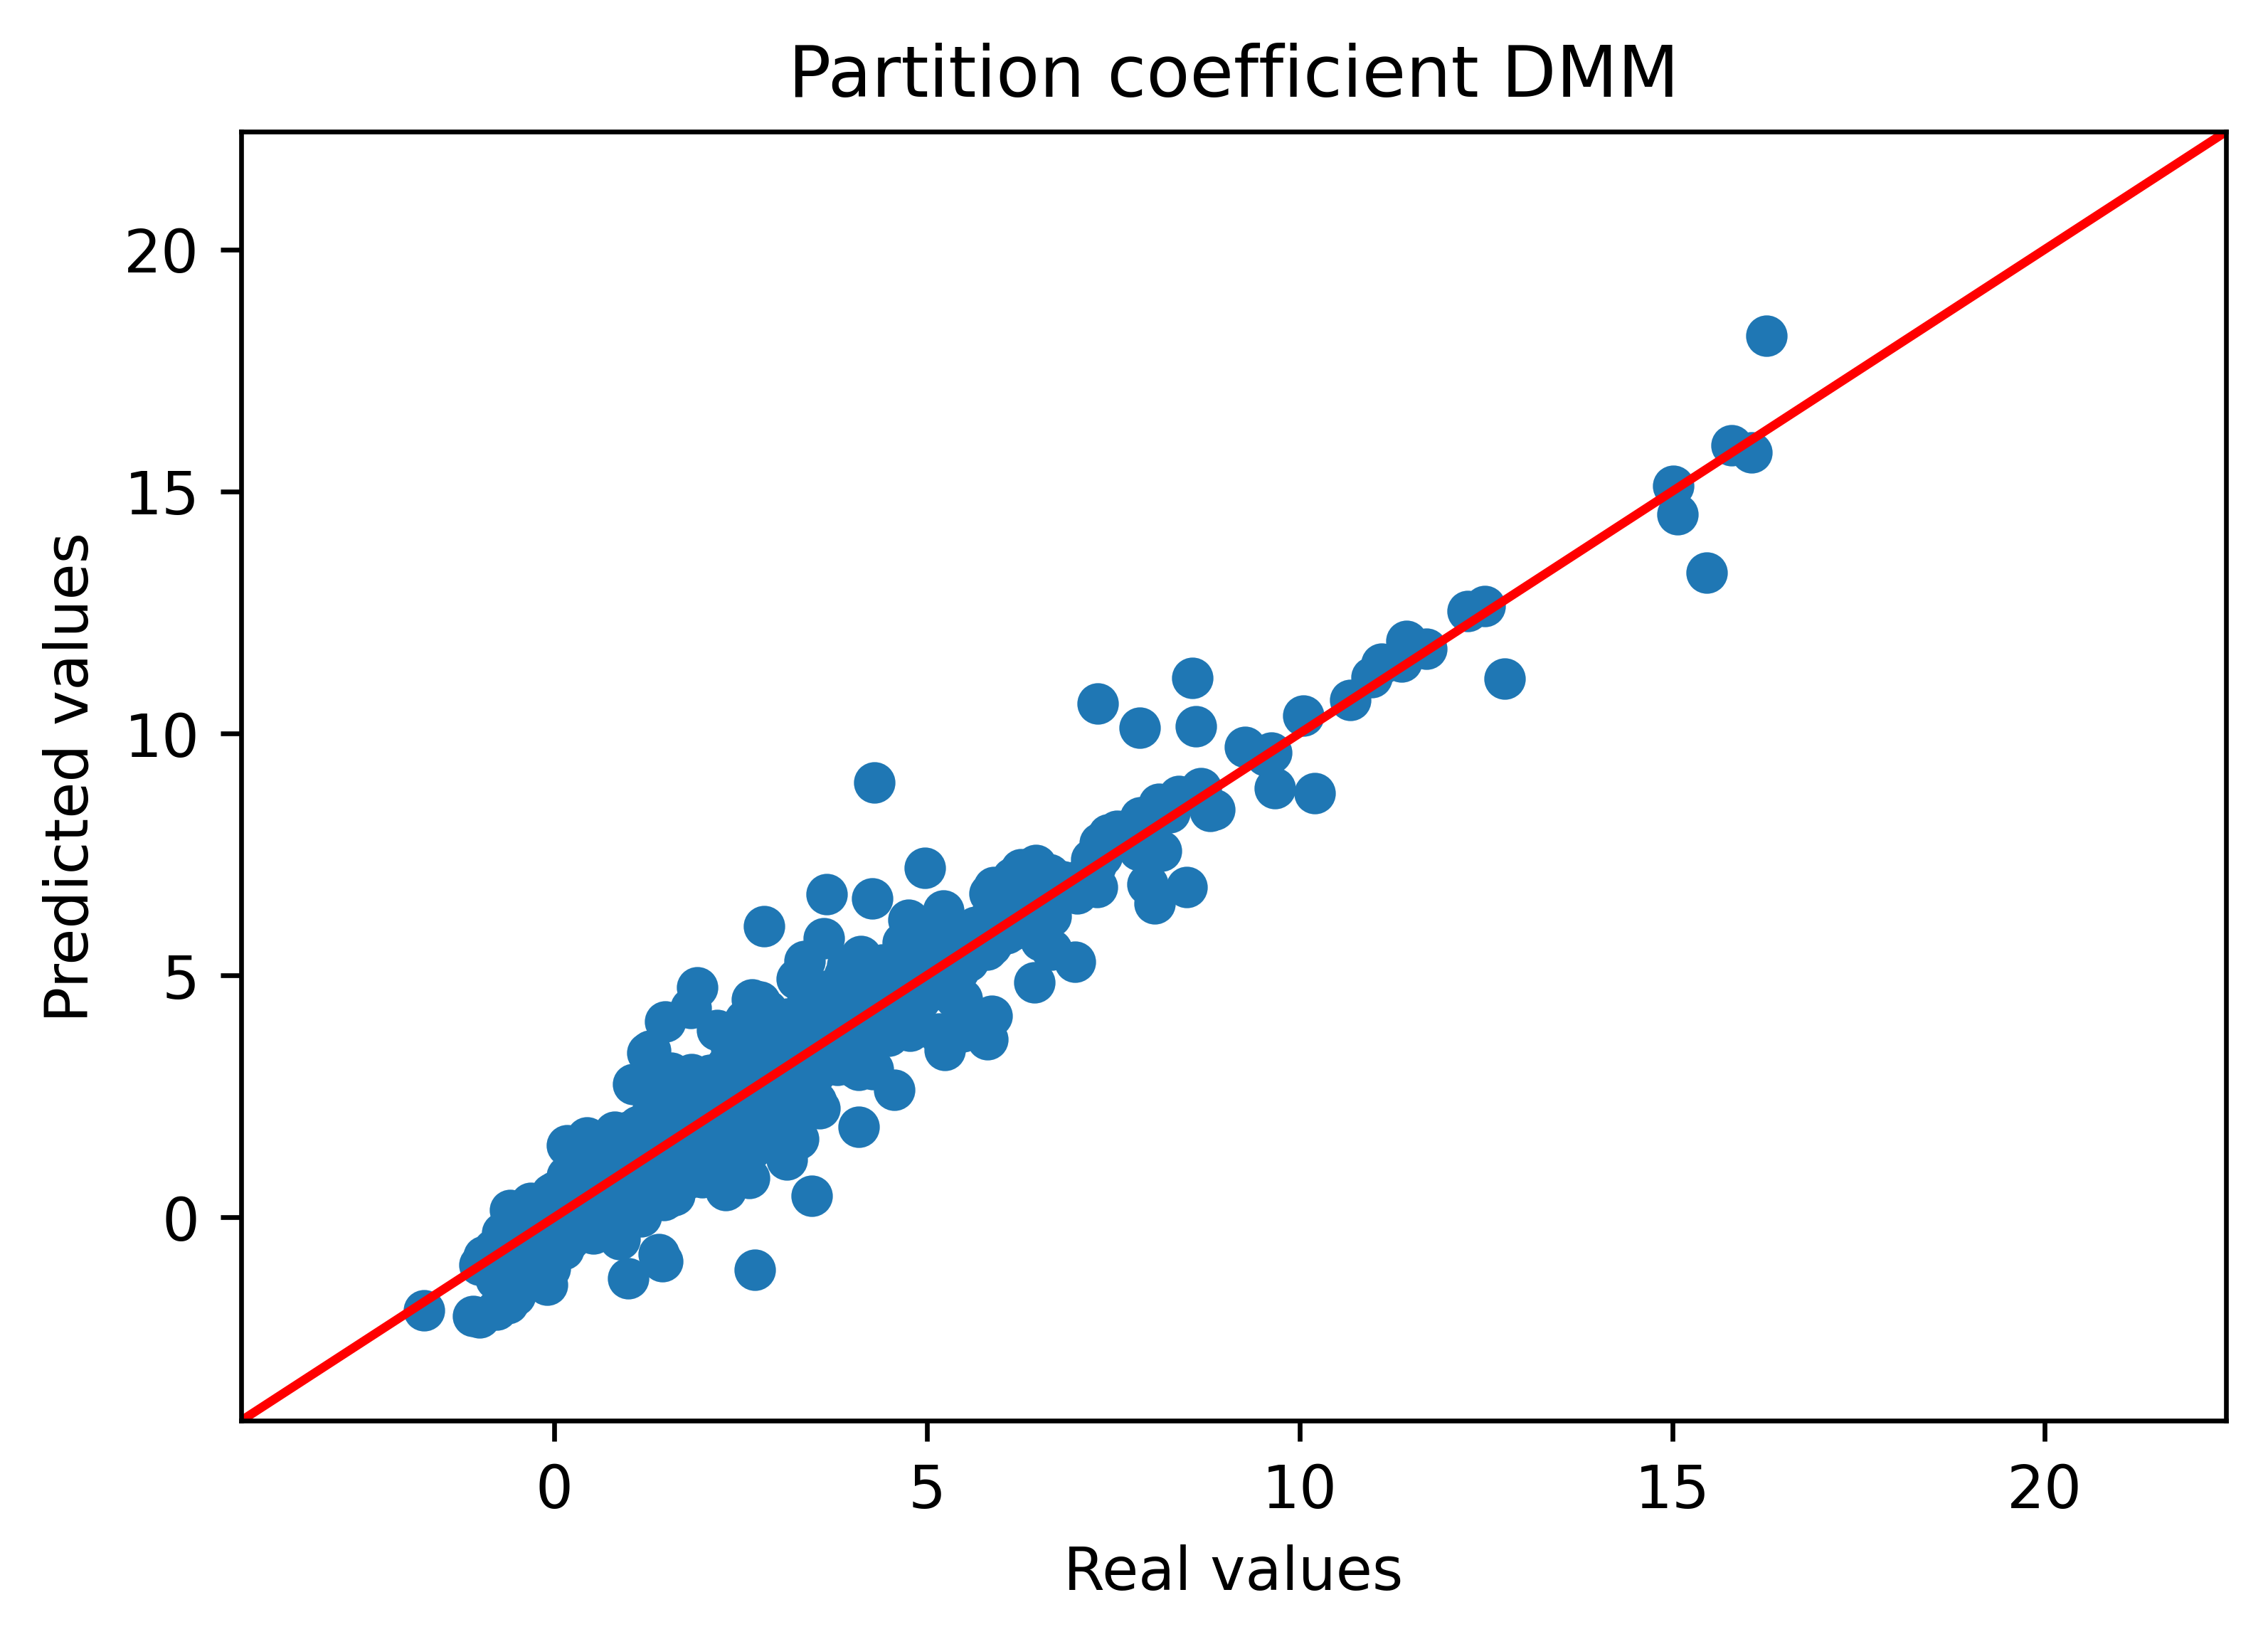

In [13]:
# Estimation of the model made visual. 
# We plot the prediction over the real data so everything on the line y=x is  
# estimated correctly. 
predictions = model_0.predict(test_dataset_RDKit)
y_min=min(y) 
y_max=max(y) 
plt.scatter(predictions,test_dataset_RDKit.y) 
plt.xlabel("Real values") 
plt.ylabel("Predicted values") 
plt.title("Partition coefficient DMM") 
plt.xlim(y_min, y_max) 
plt.ylim(y_min, y_max) 
plt.plot([y_min, y_max],[y_min, y_max], "r")

**Figure 5: Prediction vs. real value for a model with the RDKit-Featurizer method and a reduced dataset of 80 Features.**

The RDKitDescriptor contains features that can be derived from the molecular structure or sum formula. Fingerprints, on the other hand, describe the pure molecular structure. For example, the number of OH groups, aromatic rings or the number of halogenoids in the molecule are determined by means of the fingerprints.  Fingerprints thus describe the properties of the molecule that are visible from the structural formula. The MACCS fingerprints cover single atoms as well as groups. Circular fingerprints describe, starting from a central atom, which atoms are located on the so-called layers [15]. For example, in the case of ethanol the central atom would be a sp3 hybridized carbon atom. A layer around the central atom contain a sp3-hybridized carbon atom as well as a sp3-hybridized oxygen. Hence, in the circular fingerprints it is not certain in which way the atoms are interconnected. Hence, in the next step we create the datasets with the MACCSFingerprinting as well as the with the circular fingerprints. 

In [14]:
# We try two more featurizer 
feater_MACCS = dc.feat.MACCSKeysFingerprint()  # MaccsKeysFingerprints 
feater_CF = dc.feat.CircularFingerprint() # Circular Fingerprints 
 
X_Test_MACCS = feater_MACCS.featurize(X_raw) 
X_Test_CF = feater_CF.featurize(X_raw) 
# Create datasets  
dataset_MACCS = dc.data.NumpyDataset(X_Test_MACCS,y) 
dataset_CF = dc.data.NumpyDataset(X_Test_CF,y) 
# Create test and train datasets 
splitter = dc.splits.RandomSplitter() 
train_dataset_MACCS , test_dataset_MACCS = splitter.train_test_split(dataset_MACCS) 
train_dataset_CF , test_dataset_CF = splitter.train_test_split(dataset_CF)

We did now featurize the SMILES in different ways. The shape of the features varies within the different featurizing methods.  The different features will now be fitted to the random forest regression model. The accuracy of the fit and the time to evaluate the model are two criteria which can be compared to choose a method for the final model. 

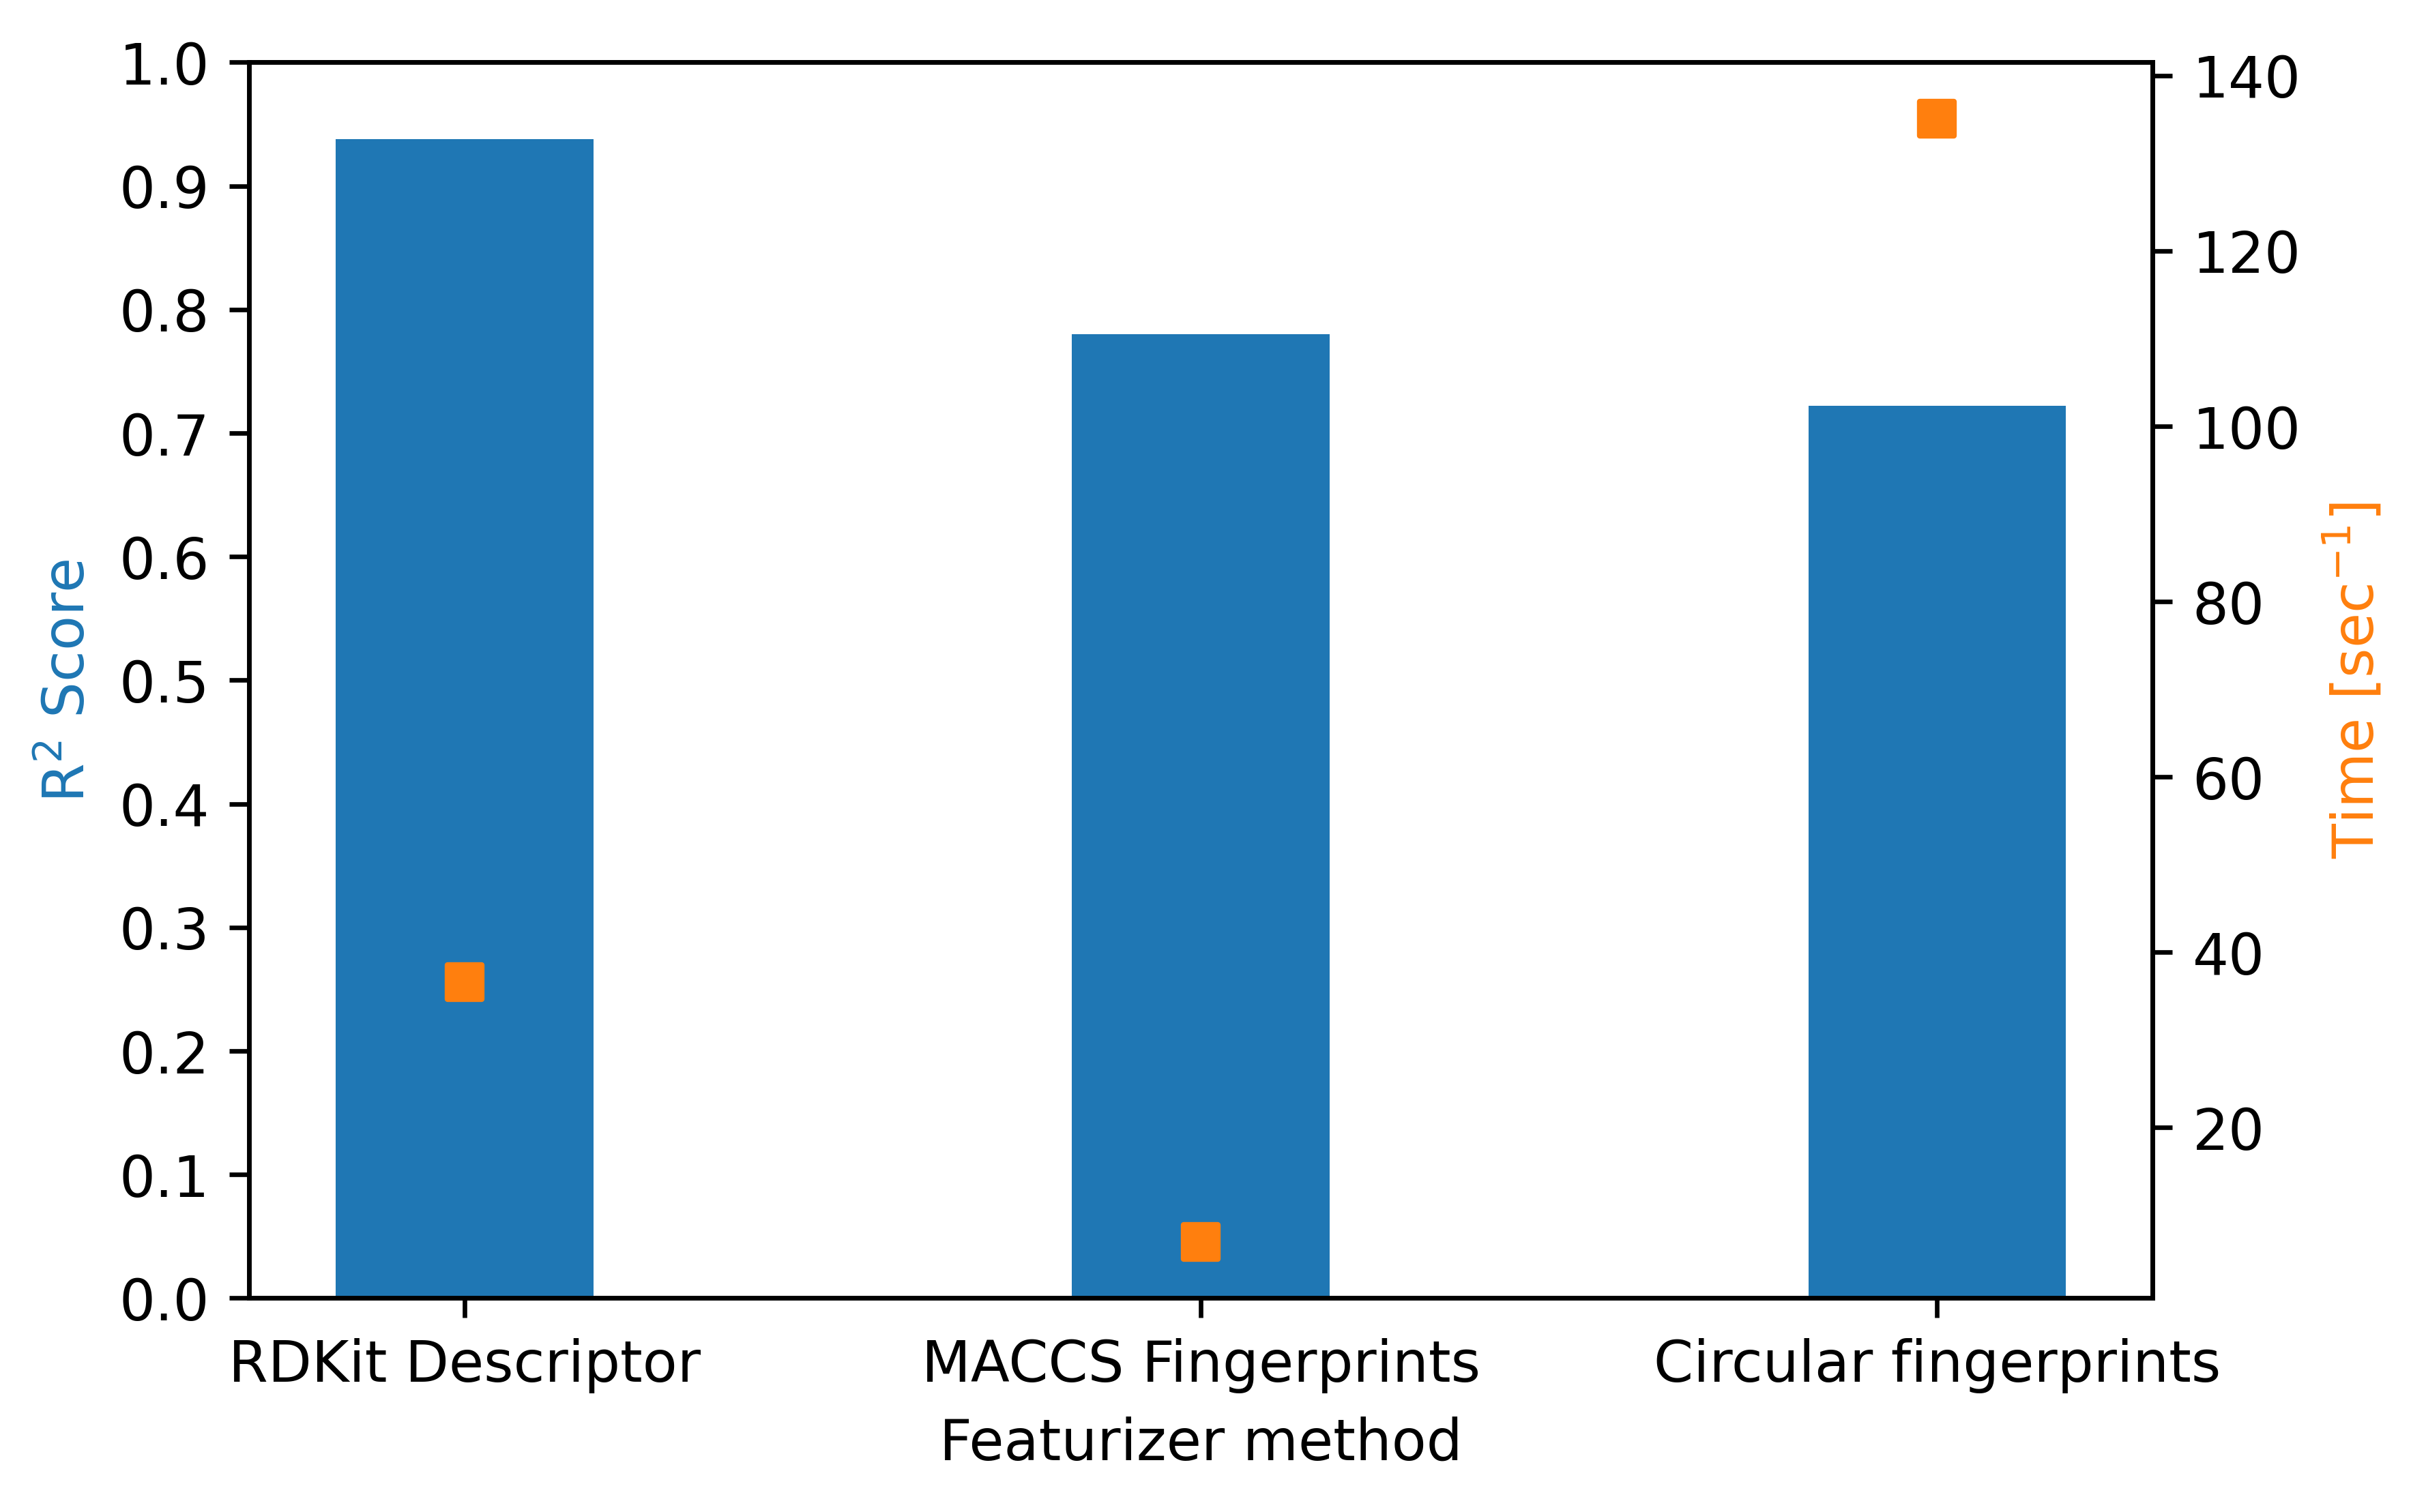

In [15]:
sklearn_model = RandomForestRegressor(random_state=0) 
model = dc.models.SklearnModel(sklearn_model) 
regression_metric = dc.metrics.Metric(dc.metrics.r2_score) 
# We define a list with the names of the featurizer 
Listnames = ["RDKit Descriptor", "MACCS Fingerprints", "Circular fingerprints"] 
# We create a set of different datasets which is iterable  
Train_List = (train_dataset_RDKit,train_dataset_MACCS,train_dataset_CF) 
Test_List = (test_dataset_RDKit,test_dataset_MACCS,test_dataset_CF) 
# Output variables 
train_score = [] 
time2fit = [] 
prediction_feat = [] 
for i,train_datasetnames in enumerate(Train_List): 
    start = time.time() 
    # Fit the model to the dataset  
    model.fit(train_datasetnames) 
    train_scores_0 = model.evaluate(Test_List[i], [regression_metric]) 
    time2fit.append(time.time()-start) 
    # Check the training scores 
    train_score.append(train_scores_0["r2_score"]) 
    prediction_feat.append(model.predict(Test_List[i]))
fig, ax1 = plt.subplots() 
ax2 = ax1.twinx() 
ax2.scatter(Listnames,time2fit,color = "C1",marker = "s") 
ax1.bar(Listnames,train_score,0.35, color = "C0"); 
ax1.set_xlabel("Featurizer method"); 
ax1.set_yticks(np.arange(0, 1.01, 0.1)) 
ax1.set_ylabel("R$^2$ Score", color = "C0"); 
ax2.set_ylabel("Time [sec$^{-1}$]", color = "C1"); 

**Figure 6: Fitting accuracy (blue) as well as the time to fit the model (orange) for different featurizer methods.**

It seems that our first choice of the RDKitDescriptor featurizer was quite good. Despite it is not the fastest method it has the highest score which makes the model more predictable. The MACCS Fingerprints are six times faster compared to the RDKitDescriptor with an accuracy of 0.78. Circular fingerprints only fit with an accuracy of 0.72 and in addition take more than two minutes two fit the train dataset. 

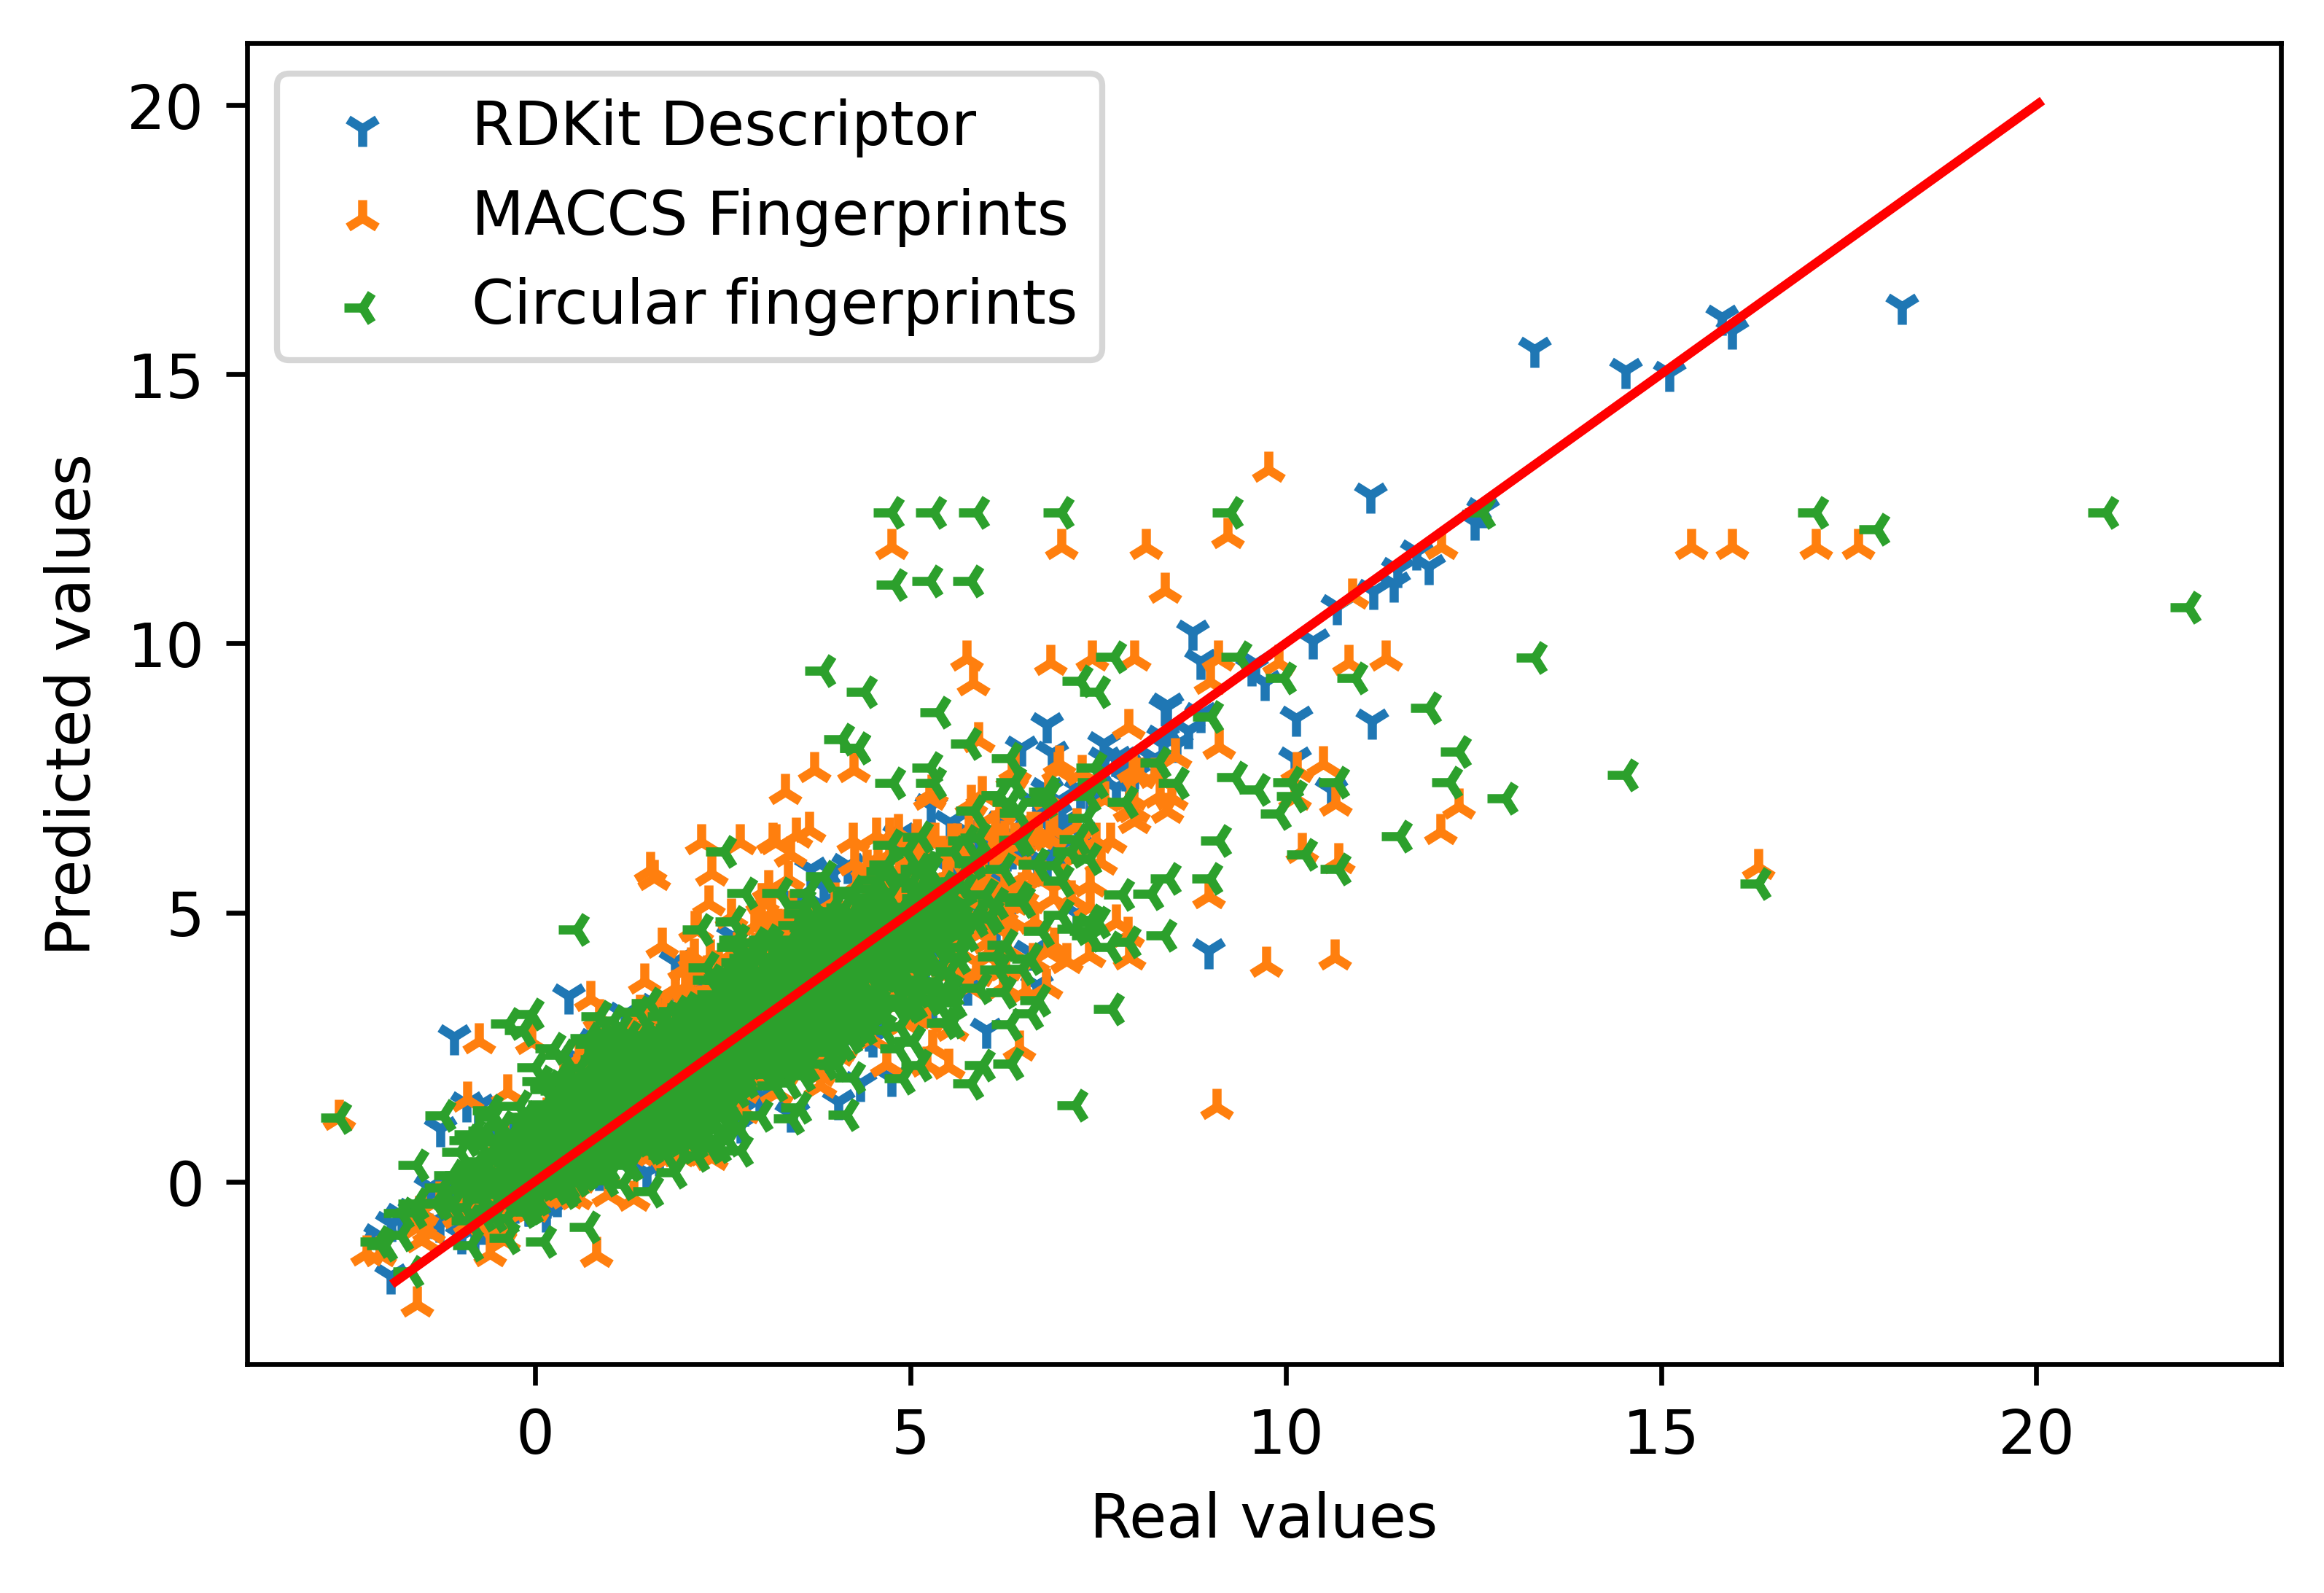

In [16]:
# Define min and max of the dataset 
y_min = min(test_dataset_RDKit.y)*0.9
y_max = max(test_dataset_RDKit.y)*1.1

plt.plot([y_min,y_max],[y_min,y_max],"r")
for i, testdataname in enumerate(Test_List):
    plt.scatter(testdataname.y,prediction_feat[i],marker = str(i+1), label = Listnames[i])
plt.xlabel("Real values")
plt.ylabel("Predicted values")
plt.legend();

**Figure 7: Comparison between real data and predicted data of the RDKit featurizer (blue) the MACCS fingerprint (orange) and Circular fingerprints (green).**  

The scatter of the different featurizers is very narrow in a range of small partition coefficients and widens significantly more for larger partition coefficients. Hence, it seems that the models are better in the prediction of small KF-values. Because of two main reasons. First, the number of data points in the range of high KF-values may not be sufficient. Second, components which have a very high KF-value are often somehow special in their behavior. For example one of the highest KF-value is observed by a perfluorinated alkane, which is nearly not miscible with water, but also nearly non miscible with other solvents. Hence the error on these datapoints might be very high from the beginning on. Overall, the RDKit featurizer seems to be the best choice for the prediction of the partition coefficient of DMM between water and the screened solvents.

At last, we want to show how you can now import a SMILES structure and predict a partition coefficient of DMM between water and a new solvent like toluene. The SMILES of the component toluene is define by a string. It is featurized with the RDKitDescriptor featurizer and the model without any modification is used. However, for the prediction the predict function only accepts numpy datasets which can be converted.

In [17]:
X_Toluene = np.array(feater.featurize("CC1=CC=CC=C1"))
print(model_0.predict(dc.data.NumpyDataset(X_Toluene, [0])))

[3.1481086]


We calculated the partition coefficient of DMM in the two phases of water and toluene which we predict to be 3.15 compared to the real value of 3.09 it only shows a deviation of 2%.

## Conclusion

Molecules as 3 dimensional objects must be described as a machine readable object. We presented some of the most important methods in this paper such as SMILES. SMILES are a string-based description of a molecule and are widely spread in different research fields. Based on the SMILES description we investigated featurizer methods to make those SMILES machine readable. Those featurizer methods performed different in their fitting performance as well in the speed of fitting datasets. In addition, we presented an example for the structural investigation of fitting data into machine learning algorithms and showed how to use them. At last, we showed the evaluation of the algorithm performance and predicted one value for an unknown component based on its SMILES.  

## Acknowledgement

This work was performed as part of the Cluster of Excellence Fuel Science Center (EXC 2186) funded by the Excellence Initiative by the German federal and state governments to promote science and research at German universities.

## Supporting information

The source code can be found on the git server of RWTH University under https://git.rwth-aachen.de/palkovits/encodings2021_sourcecode.

## Literature
[1] S. Palkovits, R. Palkovits, ACS Catal. 2019, 9, 9, 8383–8387 </br>
[2] S. Palkovits, ChemCatChem 2020, 12, 3995–4008 </br>
[3] G. A. Pinheiro, J. Mucelini, M. D. Soares, R. C. Prati, J. L. F. Da Silva, M. G. Quiles, J. Phys. Chem. A 2020, 124, 47, 9854–9866 </br>
[4] M. Krenn, F. Häse, A. Nigam, P. Friedrich, A. Aspuru-Guzik, Mach. Learn.: Sci. Technol. 2020, 1, 045024 </br>
[5] S. Kearnes, K. McCloskey, M. Berndl, V. Pande, P. Riley, J. Comput.-Aided Mol. Des. 2016, 30, 595−608 </br>
[6] D.K. Duvenaud, D. Maclaurin, J. Iparraguirre, R. Bombarell, T. Hirzel, A. Aspuru-Guzik, R.P. Adams, Adv. Neural Inf. Process. Syste. 2015, pp 2224–2232 </br>
[7] S. Jaeger, S. Fulle, S. Turk, J. Chem. Inf. Model. 2018, 58, 27−35 </br>
[8] M. Rupp, A. Tkatchenko, K.R. Müller, O. A. v. Lilienfeld, Phys. Rev. Lett. 108 2012, 058301 </br>
[9] J. Schrier, J. Chem. Inf. Model. 2020, 60, 8, 3804–3811 </br>
[10] N.J. Lentelink, S. Palkovits, Adv. Theory Simul. 2020, 3, 2000148 </br>
[11] K. Hansen, F. Biegler, R. Ramakrishnan, W. Pronobis, O. A. v. Lilienfeld, K.R. Müller, A. Tkatchenko, J. Phys. Chem. Lett. 2015, 6, 12, 2326–2331 </br>
[12] J.S. Delaney, J. Chem. Inf. Comput. Sci. 2004, 44, 3, 1000–1005 </br>
[13] D. Weininger, J. Chem. Inf. Comput. Sci. 1988, 28, 31–6 </br>
[14] D. Rogers, M. Hahn, J. Chem. Inf. Model. 2010, 50(5), 742–754 </br>
[15] R. C. Glem, A. Bender, C. H. Arnby, L. Carlsson, S. Boyer, J. Smith, IDrugs 2006, 9(3), 199–204</br>
[16] H.L. Morgan, J. Chem. Doc. 1965, 5(2), 107–113 </br>
[17] G. Landrum, 2006, https://www.rdkit.org/ </br>
[18] A.T. Balaban, J Chem. Inf. Comput. Sci. 1985, 25, 334-343 </br>
[19] T. Mikolov, I. Sutskever, K. Chen, G.S Corrado, J. Dean, Adv. Neural Inf. Process. Syst. 2013, 26 </br>
[20] F. Musil, A. Grisafi, A. P. Bartok, C. Ortner, G. Csanyi, M. Ceriotti, Chem. Rev. 2021, 121, 16, 9759–9815 </br>
[21] M.F. Langer, A. Goeßmann, M. Rupp, https://arxiv.org/abs/2003.12081v2 </br>
[22] J. Behler, J. Chem. Phys. 2011, 134, 074106 </br>
[23] C.R. Harris, K.J. Millman, S.J. van der Walt, R. Gommers, P. Virtanen, D. Cournapeau, [...] T.E. Oliphant, Nature 2020, 585(7825), 357-362. doi:10.1038/s41586-020-2649-2 </br>
[24] B. Ramsundar, P. Eastman, P. Walters, V. Pande, 2019, O'Reilly Media, Inc. </br>
[25] J. D. Hunter, Comp. in Sci. & Eng. 2007, 9(3), 90-95. doi:10.1109/MCSE.2007.55 </br>
[26] F. Pedregosa, G. Varoquaux, A. Gramfort, V. Michel, B. Thirion, O. Grisel et al.,  J. of Mach. Learn. Res. 2011, 12, 2825-2830. </br>
[27] W. McKinney, others, In: Proceedings of the 9th Python in Science Conference. 2010. p. 51–6. </br>
[28] A. Klamt, J. Phys. Chem. 1995, 99(7), 2224-2235. doi:10.1021/j100007a062</br>
[29] A. Klamt, G. Schuurmann, G., J. Chem. Soc. 1993, 2(5), 799-805. doi:10.1039/P29930000799  
[30] L.H. Hall, L.B. Kier, Rev. comp. chem. 1991, 367-422. </br>
[31] P. Ertl, B. Rohde, P. Selzer, J. med. chem. 2000, 43(20), 3714-3717. </br>